In [1]:
import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA/weather data analysis')

# Verify the change
print(os.getcwd())

/Users/payalteyung/Desktop/DA/weather data analysis


In [22]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("file.csv")

In [4]:
df.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [5]:
df.shape

(8784, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
df.describe()

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000

# DATA CLEANING

In [11]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [13]:
df['Weather'].unique

<bound method Series.unique of 0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object>

Handling missing values

In [9]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Handling duplicates

In [14]:
df_duplicate = df.duplicated().any()
print(df_duplicate)

False


There are no duplicate value

# Data Analysis

In [15]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [16]:
# Convert Date/Time column to datetime format
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df["Year"] = df["Date/Time"].dt.year
df["Month"] = df["Date/Time"].dt.month
df["Day"] = df["Date/Time"].dt.day
df["Hour"] = df["Date/Time"].dt.hour
df.drop(columns=["Date/Time"], inplace=True)

In [17]:
# Group weather conditions into broader categories
weather_groups = {
    "Clear": ["Mainly Clear", "Clear"],
    "Cloudy": ["Mostly Cloudy", "Cloudy"],
    "Rain": ["Rain", "Rain Showers", "Drizzle", "Freezing Rain", "Freezing Drizzle"],
    "Snow": ["Snow", "Snow Showers", "Snow Pellets", "Freezing Fog", "Ice Pellets"],
    "Storm": ["Thunderstorms", "Thunderstorms,Rain", "Thunderstorms,Heavy Rain Showers"],
    "Fog/Haze": ["Fog", "Haze"]
}

In [18]:
def map_weather(condition):
    for category, conditions in weather_groups.items():
        if condition in conditions:
            return category
    return "Other"

In [19]:
df["Weather"] = df["Weather"].apply(map_weather)

In [20]:
# Drop rows where Weather is categorized as 'Other'
df = df[df["Weather"] != "Other"]

# Exploratory Data Analysis

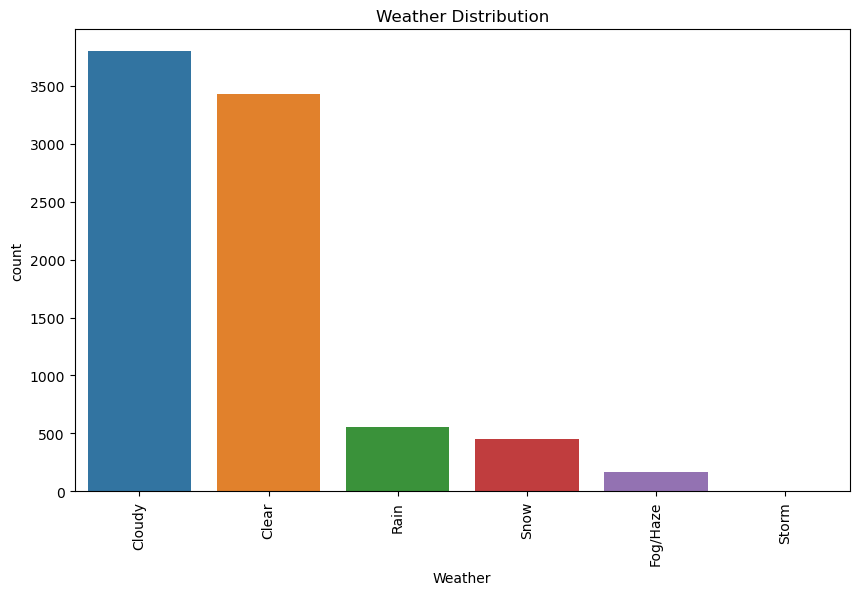

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Weather"], order=df["Weather"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Weather Distribution")
plt.show()

In [25]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Fog/Haze'

<Figure size 1200x800 with 0 Axes>

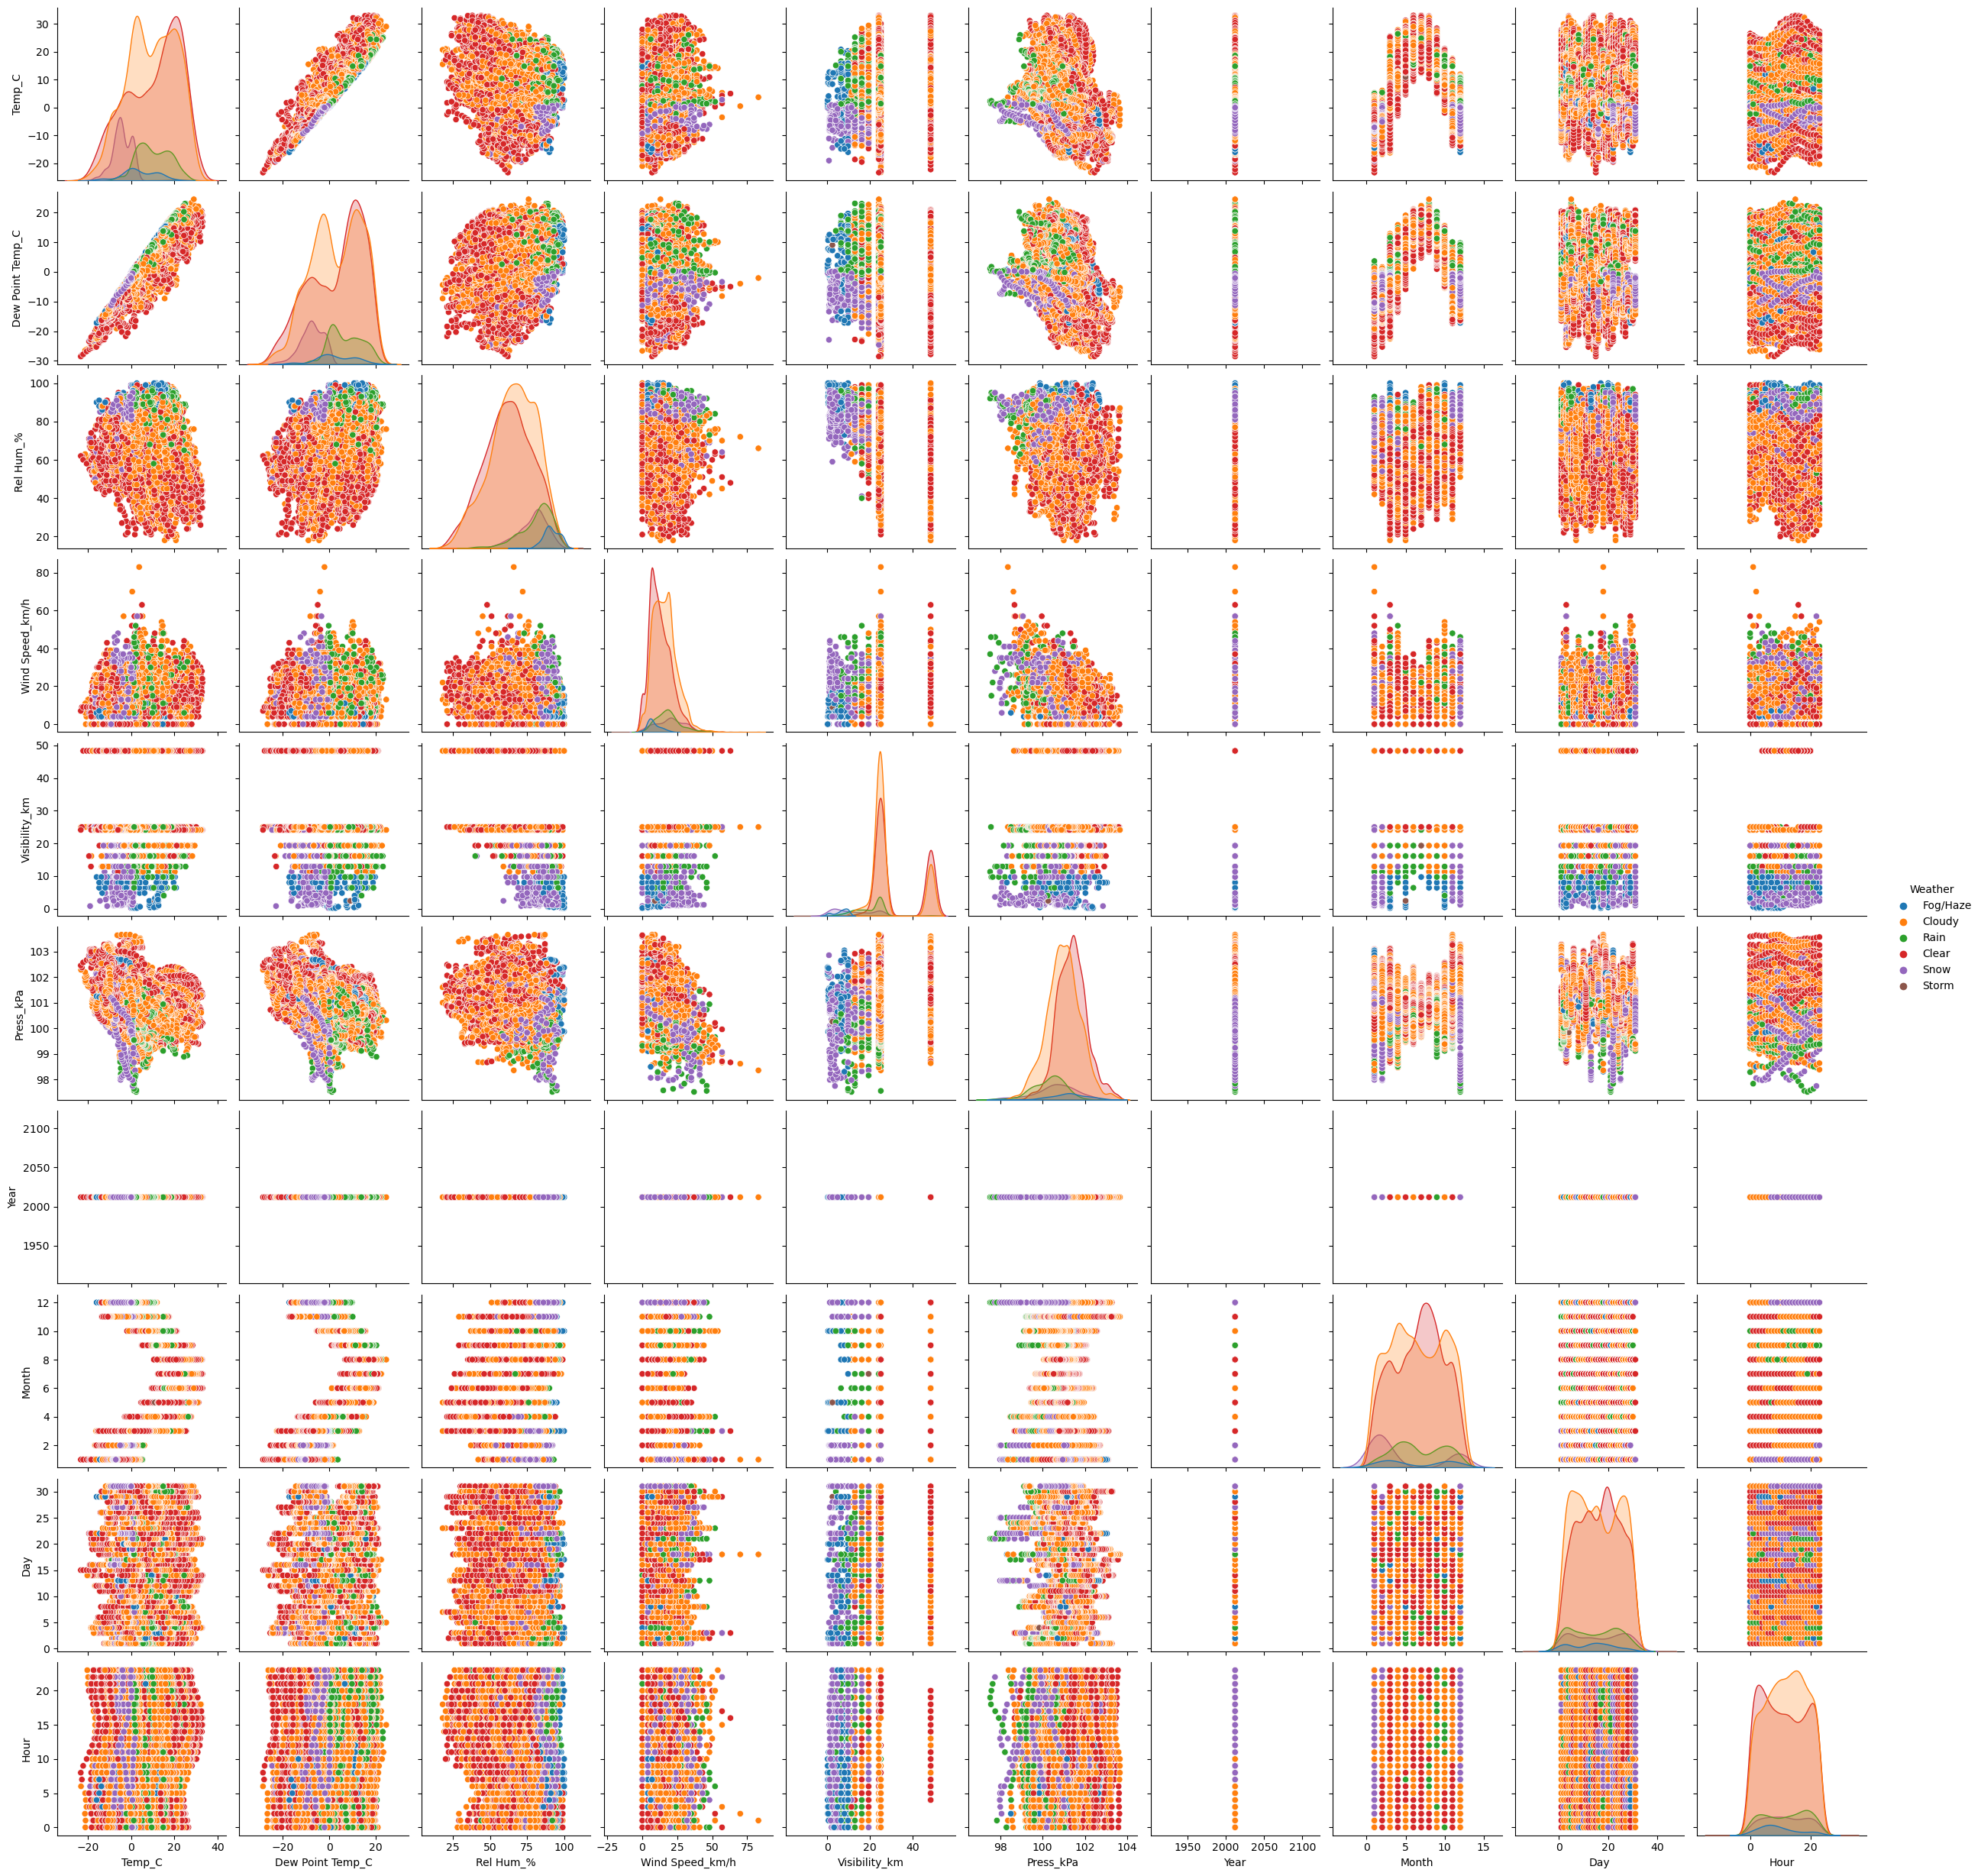

In [26]:
sns.pairplot(df, hue="Weather", diag_kind="kde")
plt.show()

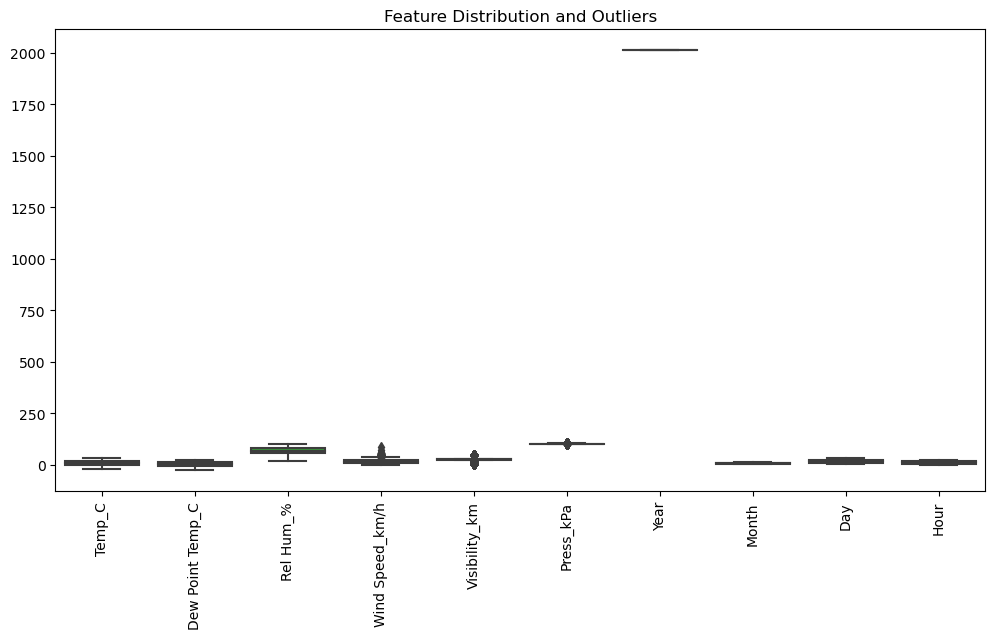

In [27]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Weather"]))
plt.xticks(rotation=90)
plt.title("Feature Distribution and Outliers")
plt.show()

Model Training

In [28]:
# Encode categorical target variable
le = LabelEncoder()
df["Weather"] = le.fit_transform(df["Weather"])

In [29]:
# Define features and target
X = df.drop(columns=["Weather"])
y = df["Weather"]

In [30]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train and evaluate multiple models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [33]:
best_model = None
best_accuracy = 0
best_model_name = ""

In [34]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

RandomForest Model Accuracy: 0.7867
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       675
           1       0.76      0.80      0.78       753
           2       0.79      0.96      0.87        27
           3       0.74      0.54      0.62       125
           4       0.84      0.69      0.76       101
           5       0.00      0.00      0.00         2

    accuracy                           0.79      1683
   macro avg       0.66      0.64      0.64      1683
weighted avg       0.79      0.79      0.78      1683

GradientBoosting Model Accuracy: 0.6982
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       675
           1       0.67      0.72      0.69       753
           2       0.74      0.85      0.79        27
           3       0.69      0.42      0.52       125
           4       0.84      0.64      0.73       101
        

In [35]:
print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

Best Model: RandomForest with Accuracy: 0.7867


In [36]:
# Save the best model and preprocessing objects
joblib.dump(best_model, "weather_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']